# ¡Hola Elias! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Elias has realizado un análisis exploratorio de datos (EDA) muy apropiado, estudiando de manera cuidadosa la distribución de los datos y sus correlaciones, lo cual proporciona una base sólida para el análisis posterior. 
    
En cuanto al entrenamiento de modelos, has implementado correctamente los modelos de clasificación, utilizando métricas relevantes como accuracy, precision y recall. Sin embargo, para enriquecer tu análisis, te sugiero incluir herramientas adicionales como la matriz de confusión, ya que estas métricas te permitirán comprender mejor el rendimiento específico del modelo para cada categoría. 
    
En lo que respecta a la identificación de clusters de usuarios, has realizado un trabajo acertado en la caracterización de los diferentes grupos, lo cual contribuye a una mejor comprensión de los patrones de comportamiento. Recuerda que cada aspecto del análisis de datos es una oportunidad para profundizar tu comprensión y que la exploración de diferentes métricas y técnicas te ayudará a desarrollar una visión más completa y robusta en tus proyectos futuros; asimismo, es clave saber cuándo acompañar los datos con una gráfica para brindarle mayor claridad a la información obtenida,
    
Te deseo éxitos en tu próximo Sprint 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

---

In [1]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Es una gran idea crear una función para hacer una revisión inicial de los datos, esto permite estructurar mejor los datos. Usar funciones como `info`, `sample` y `describe` permite identificar la estructura y contenido de los datos. Asimismo, has incluido funciones para comprobar la presencia de datos duplicados y faltantes. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada.

</div>

In [2]:
# - Llevar a cabo el análisis exploratorio de datos (EDA)
# Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

data = pd.read_csv('/datasets/gym_churn_us.csv')
looks(data)


Se ejecuta la descripción de los datos:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.00

#### Se encuentra que la calidad de los datos es suficiente para poder realizar los analisis; ya que no hay valores perdidos o duplicados.

In [3]:
# Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby())
# Aplicar la función looks a cada grupo por Churn
for churn, group in data.groupby('Churn'):
    print(f"\nAnálisis para Churn = {churn}:")
    looks(group)


Análisis para Churn = 0:
Se ejecuta la descripción de los datos:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  2939.000000    2939.000000  2939.000000    2939.000000  2939.000000   
mean      0.510037       0.873086     0.534195       0.353522     0.903709   
std       0.499984       0.332933     0.498914       0.478144     0.295040   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     1.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      2939.000000   2939.000000  2939.000000   
mean          5.747193      0.464103    29.976523   
std           4.716942      0.498795     3.009933   
min           1.000

### De la misma manera se encuentra que separando los datos por cancelacion no hay cambios respecto a la calidad

Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
Crea una matriz de correlación y muéstrala.

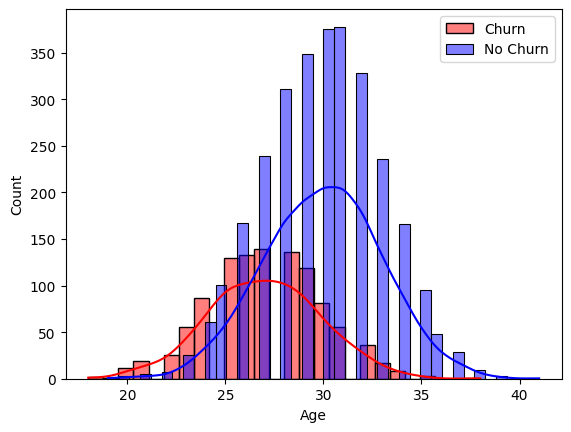

In [4]:
sns.histplot(data[data['Churn'] == 1]['Age'],
             color='red', label='Churn', kde=True)
sns.histplot(data[data['Churn'] == 0]['Age'],
             color='blue', label='No Churn', kde=True)
plt.legend()
plt.show()

Encontramos que hay una mayor proporcion de cancelalaciones. De manera inicial se sugiere que la edad puede ser un elemento implicado en la cancelacion.


In [5]:
# Se realiza la matriz de correlacion para los datos
correlation_matrix = data.corr()
correlation_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [6]:
# se hace una matriz de correlacion separando los datos por cancelados vs no cancelados 
for churn, group in data.groupby('Churn'):
    print(f"\nCorrelacion para Churn = {churn}:")
    print(group.corr())


Correlacion para Churn = 0:
                                     gender  Near_Location   Partner  \
gender                             1.000000       0.004588 -0.017409   
Near_Location                      0.004588       1.000000 -0.015871   
Partner                           -0.017409      -0.015871  1.000000   
Promo_friends                     -0.002746       0.198554  0.455108   
Phone                             -0.008443      -0.013571  0.021220   
Contract_period                   -0.002893       0.130844  0.294745   
Group_visits                       0.015434       0.147798 -0.011820   
Age                                0.014745       0.006876 -0.011818   
Avg_additional_charges_total      -0.013551       0.023125 -0.006994   
Month_to_end_contract             -0.005047       0.122438  0.280882   
Lifetime                           0.019150       0.022296 -0.013123   
Avg_class_frequency_total          0.018719       0.001698 -0.019247   
Avg_class_frequency_current_month  

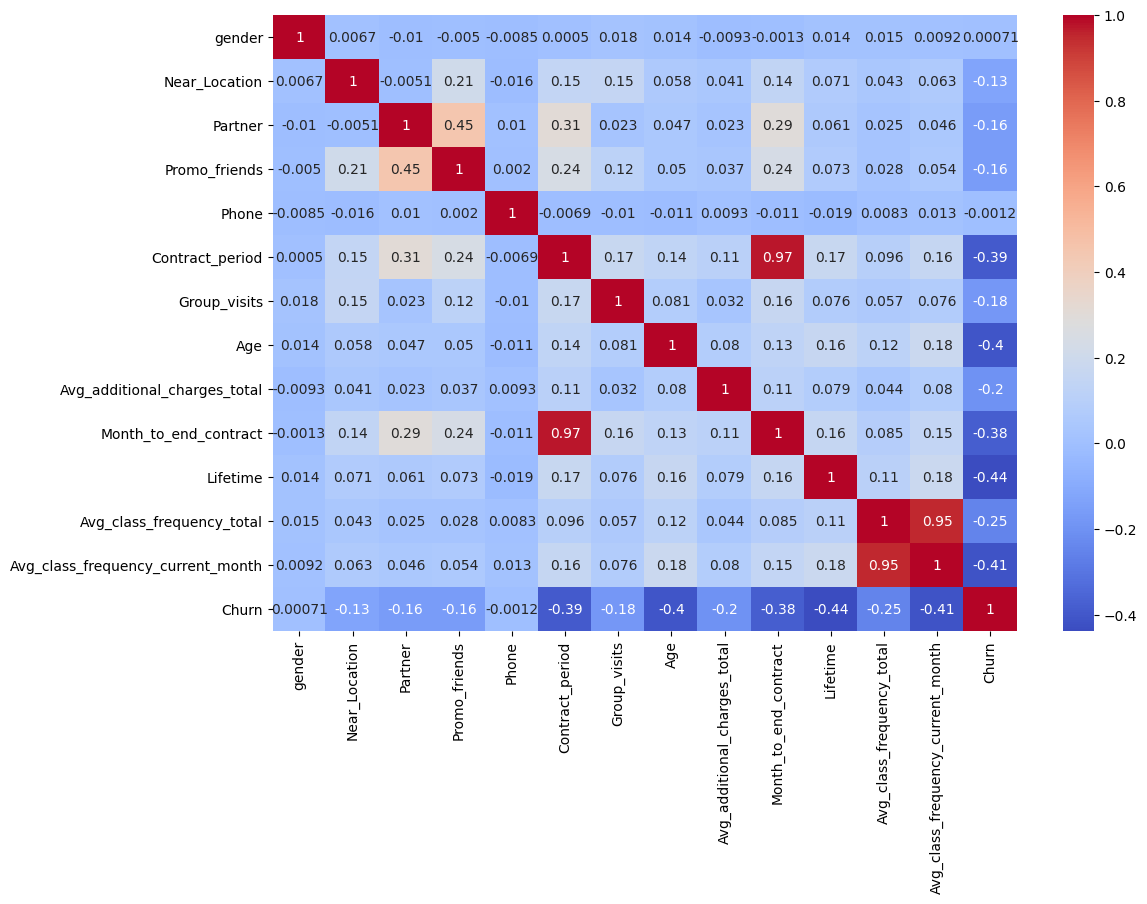

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en la visualización de los datos, especialmente en el uso de histogramas para mostrar la distribución de los datos y la comparativa entre las dos clases de churn. La inclusión de la matriz de correlación también es un gran detalle para identificar relaciones entre variables. Sin embargo, recuerda que es fundamental acompañar estas gráficas con un análisis y observaciones detalladas para añadir valor significativo a la información presentada y evitar que los datos se presenten de manera aislada y sin contexto.

</div>

In [8]:
# Se cargan librerias, se hacen los preliminares y se generan los modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split


# Definir las características (X) y la variable objetivo (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de regresión logística
y_pred_logistic = logistic_model.predict(X_val)

# Evaluar el modelo de regresión logística
accuracy_logistic = accuracy_score(y_val, y_pred_logistic)
precision_logistic = precision_score(y_val, y_pred_logistic)
recall_logistic = recall_score(y_val, y_pred_logistic)

print(f'Logistic Regression - Accuracy: {accuracy_logistic:.2f}, Precision: {precision_logistic:.2f}, Recall: {recall_logistic:.2f}')

# Crear y entrenar el modelo de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Realizar predicciones con el modelo de bosque aleatorio
y_pred_rf = rf_model.predict(X_val)

# Evaluar el modelo de bosque aleatorio
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}')

Logistic Regression - Accuracy: 0.92, Precision: 0.86, Recall: 0.83
Random Forest - Accuracy: 0.92, Precision: 0.84, Recall: 0.82


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buena implementación de los modelos de clasificación. Ambos modelos presentan un desempeño general similar en la clasificación, con una ligera ventaja de la Regresión Logística en términos de precisión y recall. Esto indica que comete menos falsos positivos y recupera mejor las instancias positivas reales en comparación con el Bosque Aleatorio. Dado que las diferencias son mínimas, la elección del modelo dependerá de tu análisis en relación al contexto del problema: si se busca minimizar falsos positivos, la Regresión Logística es la mejor opción, mientras que si la prioridad es maximizar la detección de casos positivos, ambos modelos ofrecen resultados comparables.

</div>

#### Se observa que la regresion logistica es ligeramente superior 

In [9]:
# estarandizar datos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val)

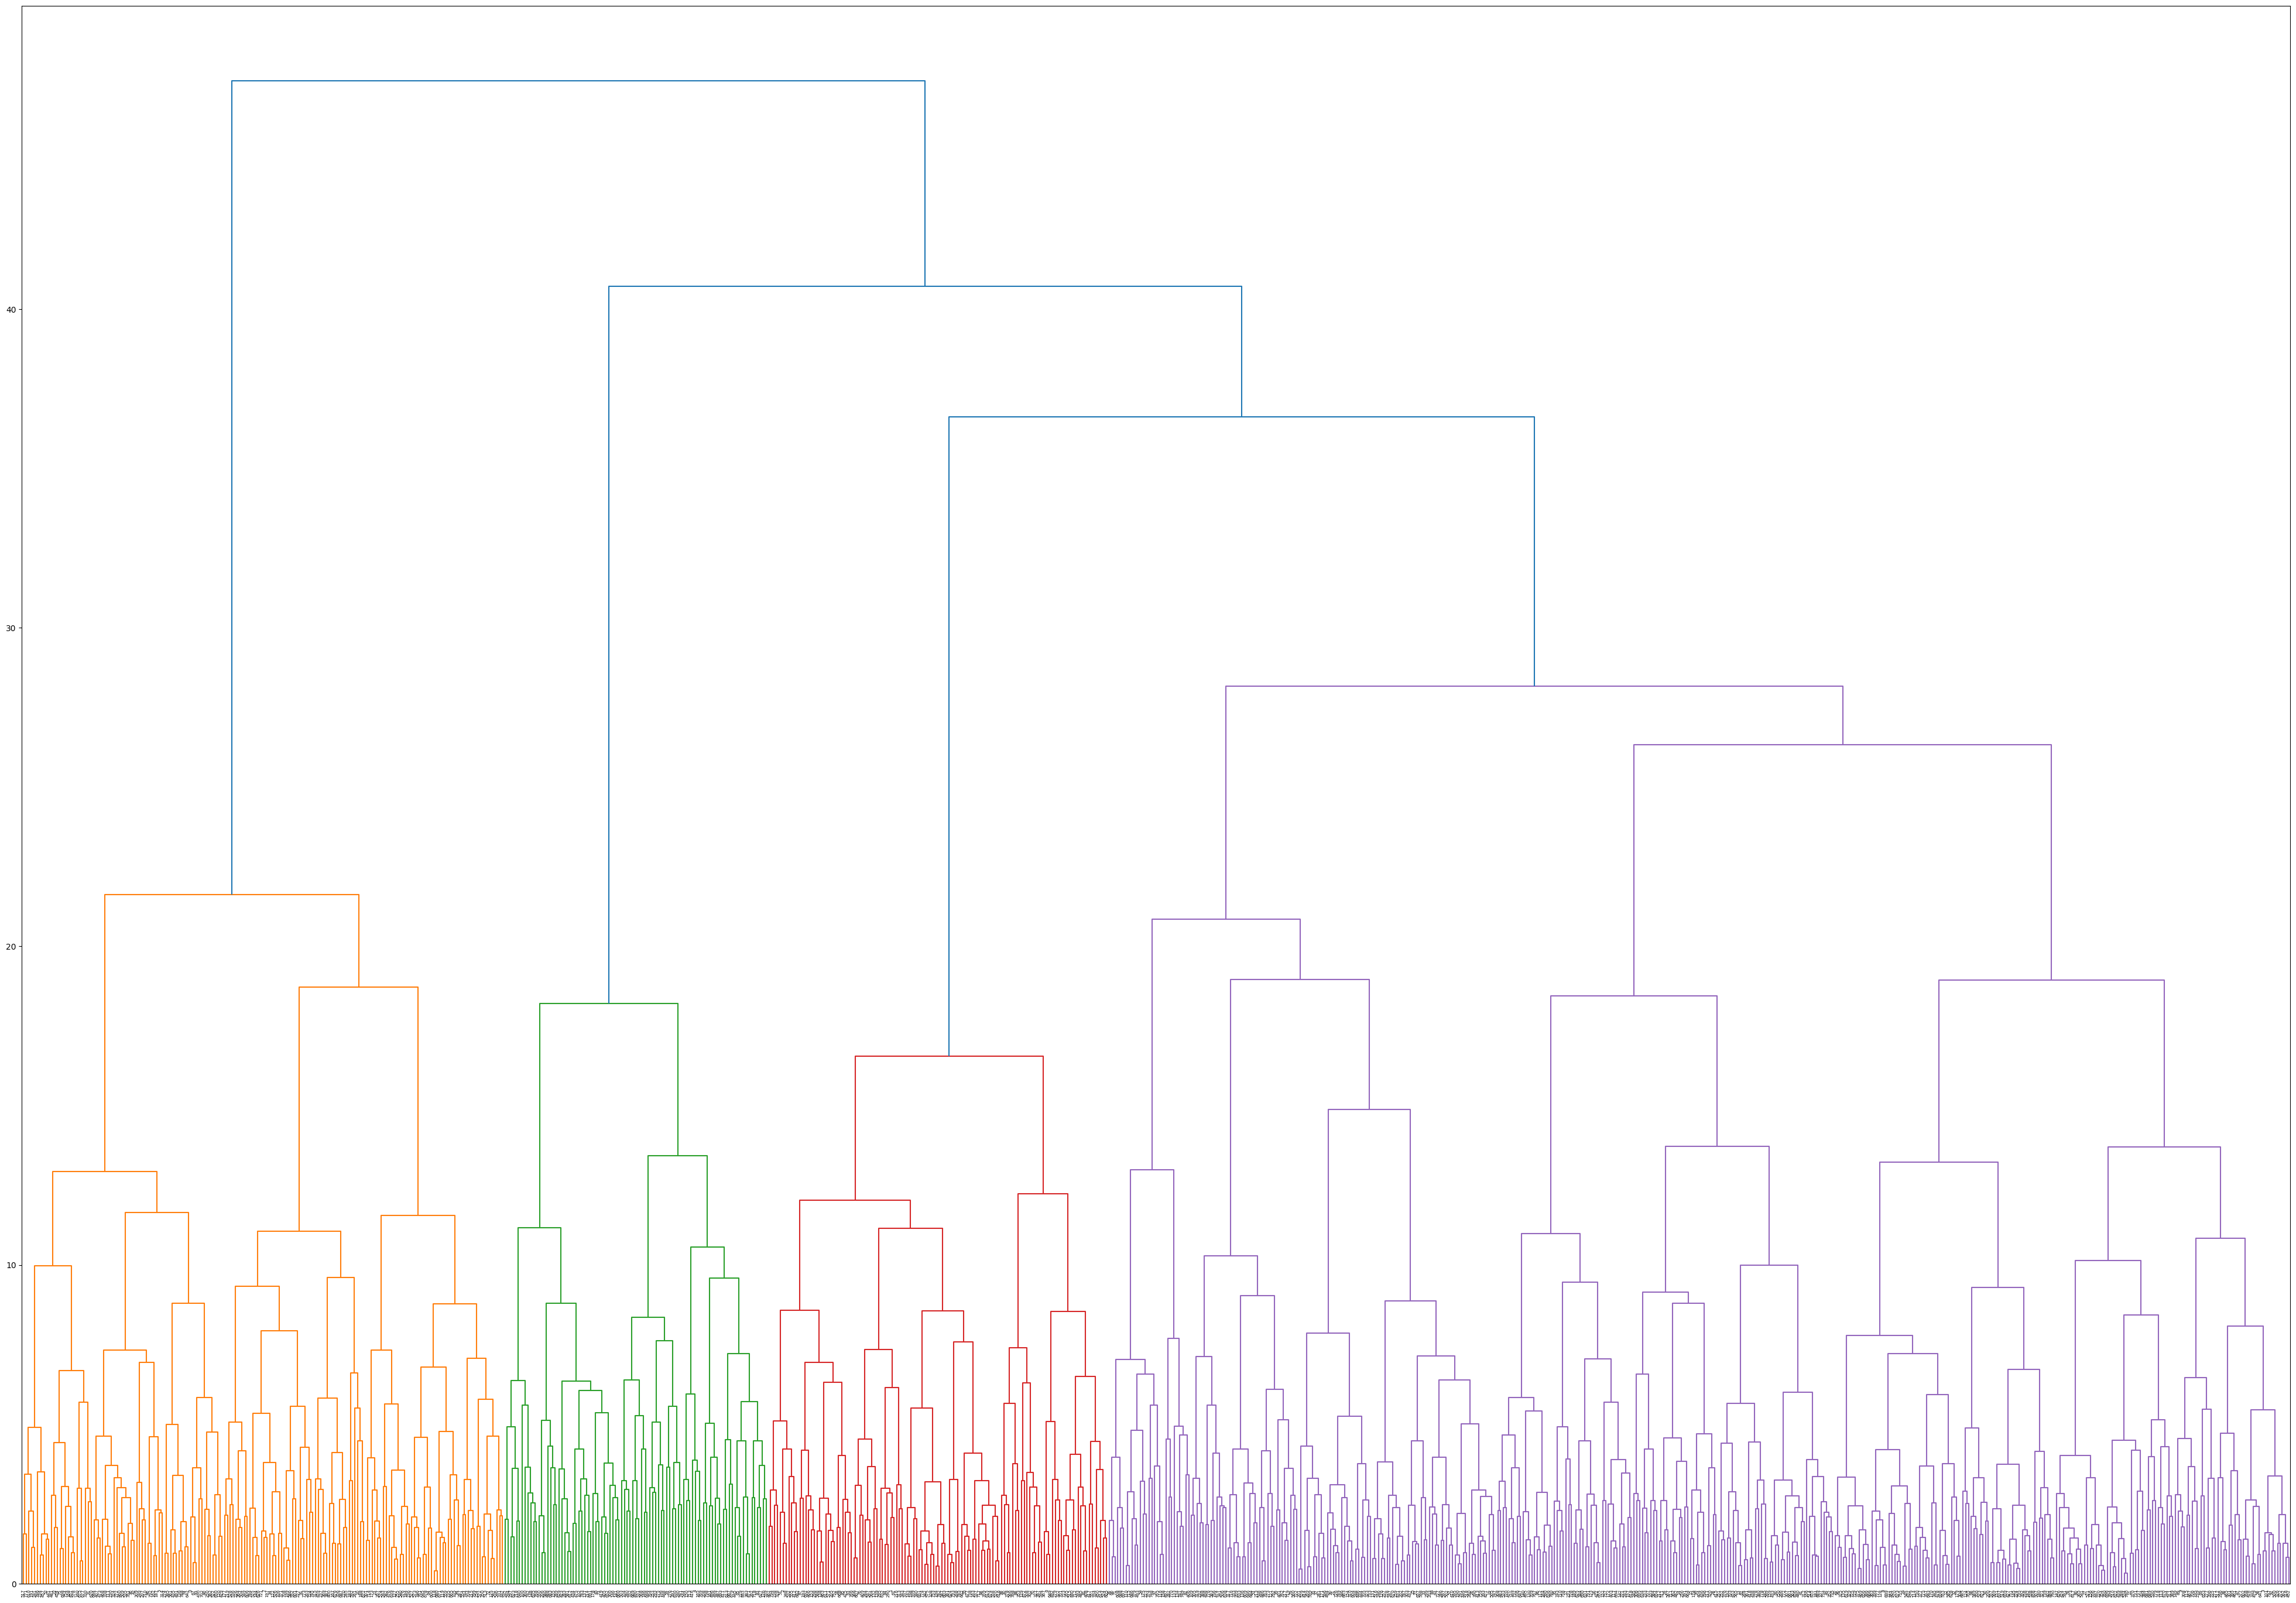

In [10]:
# Generacion de dendrograma

from scipy.cluster.hierarchy import linkage, dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(50, 35))
dendrogram(linked)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo creando el dendrograma. De manera específica tu gráfico muestra la agrupación jerárquica de los datos, donde se observan varias uniones a diferentes niveles de distancia. Para facilitar la interpretación, puedes definir un número de clusters y colorearlos con `dendrogram(..., truncate_mode='level', p = valor)`

</div>

#### Se observa que existen diferentes elementos que podrian estar implicados en la cancelacion de los usuarios.

In [11]:
# k-means Se generan 5 grupos pormedio de;
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters= 5, random_state= 0)

data['k_cluster'] = clusters.fit_predict(X)


In [12]:
# Medias de datos por cluster

data.groupby('k_cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
k_cluster,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


In [13]:
# tasa de cancelacion por cluster

data.groupby('k_cluster')['Churn'].mean()

k_cluster
0    0.334305
1    0.226611
2    0.044280
3    0.349806
4    0.178470
Name: Churn, dtype: float64

#### Encontramos que formar 5 grupos de usuario la mayoria de ellos tiene la mismma proporcion de cancelaciones, sin embargo se observa que el grupo 3 tiene una mayor proporcion con respecto a los demas, caso contrario el grupo 0 tiene la menor proporcion de cancelaciones.


#### Se sugiere investigar mas a fondo los elementos que pueden estar implicados en la cancelacion de los usuarios para poder remediar eso y generar retencion de usuarios. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo Elias, has caracterizado de manera correcta los diferentes clusters que configuran los datos de los usuarios.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

En el contexto del análisis de datos, es importante reconocer que nuestro cerebro humano enfrenta limitaciones naturales al procesar y comparar valores numéricos de gran magnitud, lo cual puede dificultar la comprensión efectiva de la información cuantitativa; por esta razón, te sugiero complementar tu análisis con una visualización mediante un gráfico, ya que esta herramienta visual transforma los datos numéricos abstractos en elementos gráficos que nuestro sistema cognitivo puede interpretar de manera más natural e intuitiva, permitiéndonos realizar comparaciones directas y facilitando la identificación de patrones, tendencias y diferencias significativas con un simple vistazo, lo que resultaría considerablemente más desafiante si solo trabajáramos con los números en su forma bruta.
</div>

</div>